In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


In [2]:
data = []
for epoch in [3, 7, 9]:
    for fold in range(8):
        df = pd.read_pickle(f'../epoch={epoch}_test_fold={fold}.pkl')
        df = df.assign(epoch=epoch, fold=fold)
        data.append(df)
data = pd.concat(data)
        

In [3]:
def plot(targets, predictions, ax, title, target_name='bandgap'):
    mae = np.abs(targets - predictions).mean() 
    ax.scatter(targets,
                predictions,
                label=f"$\mathrm{{MAE}}={mae:.4f}$",
                alpha=0.5)
    ax.set_xlabel(f"DFT {target_name}, eV")
    ax.set_ylabel(f"Predicted {target_name}, eV")
    ax.legend()

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),
        np.max([ax.get_xlim(), ax.get_ylim()]),
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_title(title)
    ax.set_aspect('equal')
    ax.set_xlim(lims)
    ax.set_ylim(lims)

    # metadata = {
    #     "Title": f"Predictions for {target_name} ",
    #     "Keywords": "2D materials, machine learning, graph neural network, MEGNet"}
   
    # fig.savefig(Path(plots_folder, f"{this_trial_name}.pdf"),
    #             metadata=metadata)

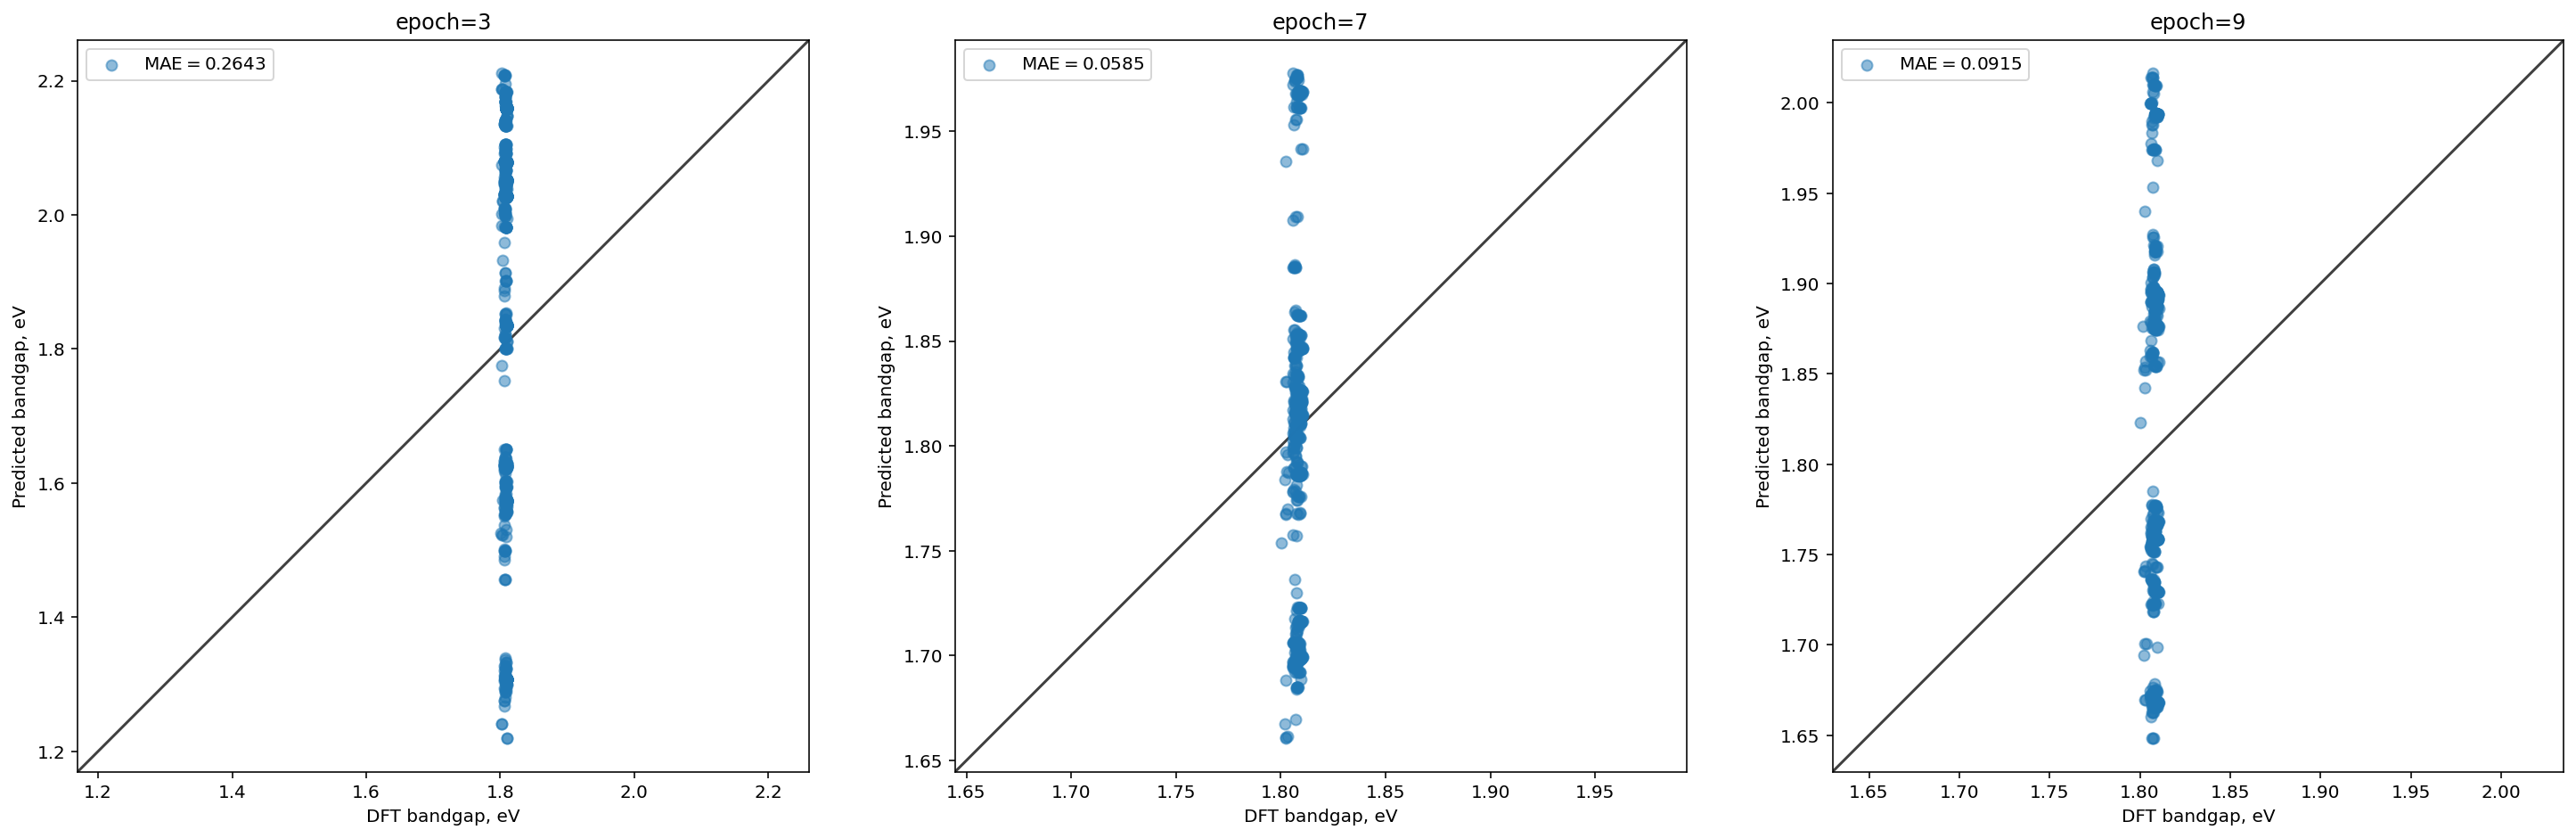

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(25, 35))

for i, (epoch, g) in enumerate(data.groupby('epoch')):

    plot(g['target'], g['pred_targets'], axs[i], f'epoch={epoch}')